## Aim: To get familiar with OpenCV operations
### Note: Use matplotlib to display images and write the code after the #Answer comment
### Grade points = 10%
### Please submit the notebook as the submission and make sure output for each cell is displayed and all cells are executed

## Important Note: Please submit your original work and don't share your work with others

In [41]:
!pip install opencv-python
!pip install opencv-contrib-python

In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Question 1

width=600, height=739, depth=3


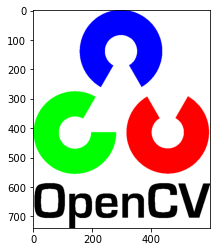

In [43]:
#read image opencv-logo
#display shape and size of the image

#Answer



# Load our image
image = cv2.imread("opencv-logo.png")
plt.imshow(image)

(h, w, d) = image.shape
print("width={}, height={}, depth={}".format(w, h, d))


### Question 2

In [44]:
#create a numpy array of zeroes that is 150 pixels tall, 200 pixels wide
#display this black image
#Similarly create a numpy array on ones with above dimensions and display the white image

#Answer

import numpy as np
from PIL import Image

array = np.zeros([100, 200], dtype=np.uint8)


for x in range(200):
    for y in range(100):
        if (x % 16) // 8 == (y % 16) // 8:
            array[y, x] = 0
        else:
            array[y, x] = 255

img = Image.fromarray(array)
print(img)

<PIL.Image.Image image mode=L size=200x100 at 0x2483D6CD820>


### Question 3

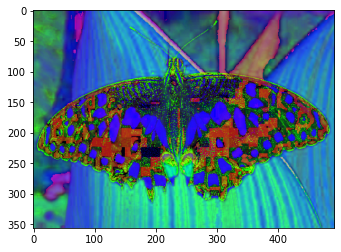

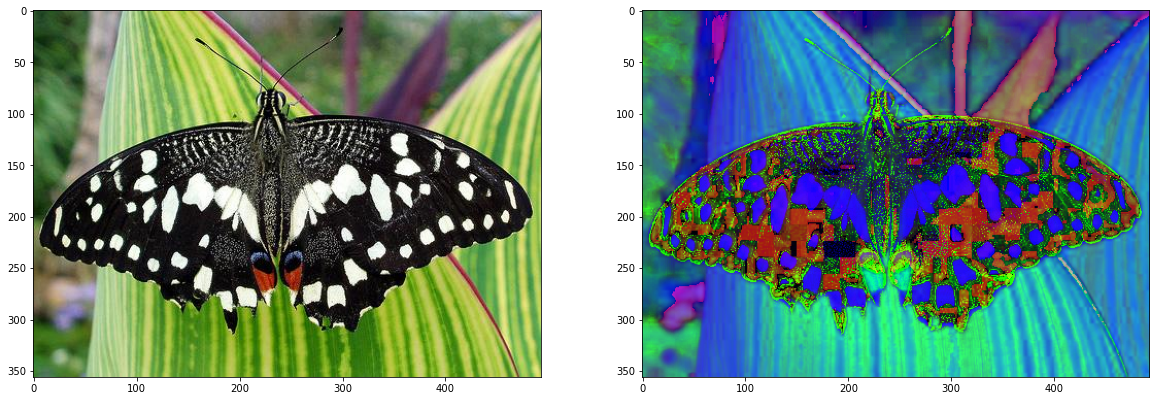

In [45]:
#read the butterfly image and display the r,g,b channels of the image
#Then display the butterfly image in the HSV color space

#Answer



img = cv2.imread('butterfly.jpg')
plt.imshow(img)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(img_hsv)

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 20))
ax1.imshow(img_rgb)
ax2.imshow(img_hsv)

plt.show()

### Question 4

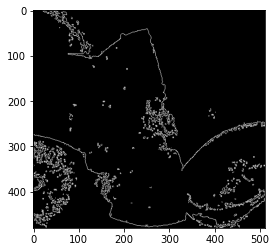

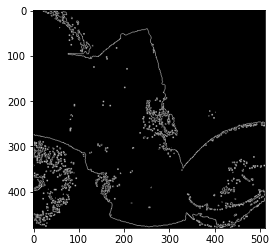

In [46]:
#read in the thresh image, perform thresholding by using gaussian blur with thresholds 5,55
#then perform dilation, erosion, opening & closing using a 5x5 kernel with 1 iteration on the original thresh image
#Finally apply canny edge detection - experiment using wide and narrow thresholds 
#(so just 2 images in total one wide and one narrow)

#Answer


img = cv2.imread('thresh.jpg',0)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)

dilation = cv2.dilate(img,kernel,iterations = 1)

opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)


canny = cv2.Canny(img, 50, 120)
plt.imshow(cv2.cvtColor(canny, cv2.COLOR_BGR2RGB))


canny = cv2.Canny(img, 10, 200)
#canny wide
plt.imshow(cv2.cvtColor(canny, cv2.COLOR_BGR2RGB))
plt.show()

canny = cv2.Canny(img, 200, 240)
#canny Narrow
plt.imshow(cv2.cvtColor(canny, cv2.COLOR_BGR2RGB))
plt.show()

canny = cv2.Canny(img, 70, 110)


### Question 5

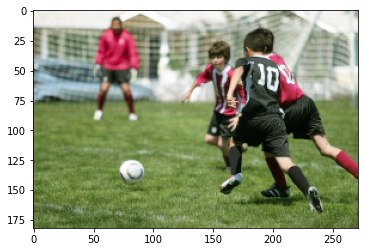

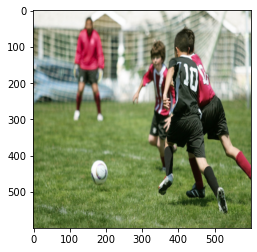

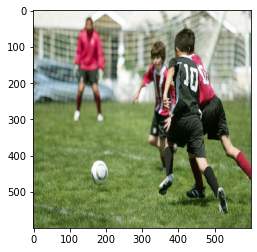

In [47]:
#read in the players image
#Perform scaling using resize method
#a) half the image using dim=(0,0), fx=0.5, fy=0.5
#b) stretch the image to dim = (600,600)
#c) stretch the image to dim = (600,600 using interpolation=cv2.INTER_NEAREST

#Answer

img = cv2.imread('players.jpg')
plt.imshow(img)


image_resize= cv2.resize(img, None, fx=0.5, fy=0.5)
plt.imshow(cv2.cvtColor(image_resize, cv2.COLOR_BGR2RGB))
plt.show()

image_resize= cv2.resize(img, (600, 600))
plt.imshow(cv2.cvtColor(image_resize, cv2.COLOR_BGR2RGB))
plt.show()


image_resize= cv2.resize(img, (600, 600), interpolation = cv2.INTER_NEAREST)
plt.imshow(cv2.cvtColor(image_resize, cv2.COLOR_BGR2RGB))
plt.show()

### Question 6

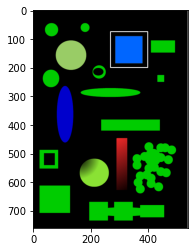

In [48]:
#read in the detect_blob image
#then draw a box shape around the blue solid box in the image that is your region of interest
#crop your region of interest
#and then rotate it 45 degrees so that it is not clipped

#Answer

img = cv2.imread('detect_blob.png')
plt.imshow(img)


start_col = 270
start_row = 75
end_col = 400
end_row = 200


img_copy = img.copy()
rectangle = cv2.rectangle(img_copy, pt1 = (start_col, start_row), pt2 = (end_col, end_row), color = (255, 255, 255), thickness = 2)
plt.imshow(cv2.cvtColor(rectangle, cv2.COLOR_BGR2RGB))
plt.show()

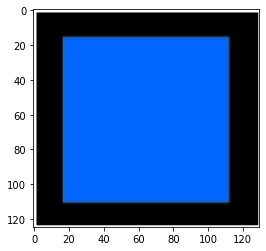

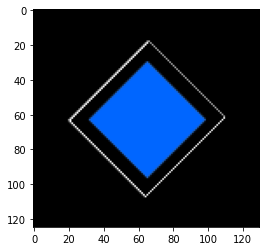

In [49]:
# crop
cropped = img_copy[start_row:end_row , start_col:end_col]
plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))
plt.show()

# rotate
height, width = cropped.shape[:2]

# Divide by two to rototate the image around its centre
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 45, .5)

# Input our image, the rotation matrix and our desired final width and height
rotated_image = cv2.warpAffine(cropped, rotation_matrix, (width, height))

plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))

### Question 7

(256, 256, 3)


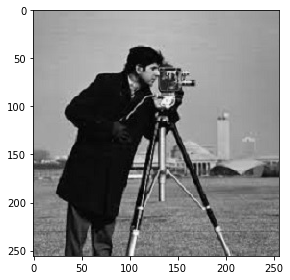

In [50]:
#read in the cameraman image
#Here we want to implement HOG to compute HOG descriptors of the image
#For HOG, use these as arguments orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1)
#Display the original image as well as the resultant image

#Answer


from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
%matplotlib inline


#reading the image
img = imread('cameraman.jpg')
imshow(img)
print(img.shape)


(128, 64, 3)


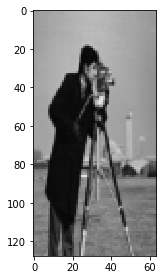

In [51]:
resized_img = resize(img, (128,64)) 
imshow(resized_img) 
print(resized_img.shape)

In [52]:
#creating hog features 
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True, multichannel=True)

C:\Users\16474\AppData\Local\Temp\ipykernel_392\4039989560.py:2: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),


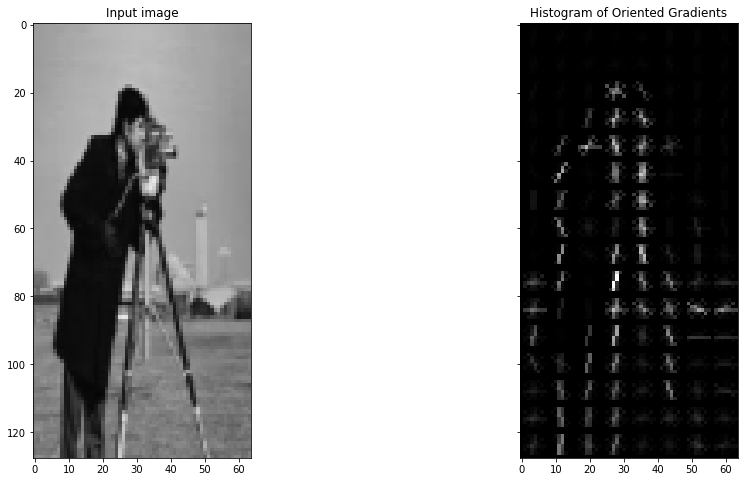

In [53]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(resized_img, cmap=plt.cm.gray) 
ax1.set_title('Input image') 

# Rescale histogram for better display 
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()

### Question 8

In [54]:
#read in the chess_football image
#Here we want to implement Harris Corner detection
#use  k =0.001
#Display the original image as well as the resultant image

#Answer


import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

filename = 'chess_football.png'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)



In [55]:
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]

#fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 20))
#ax1.imshow(dst)
#ax2.imshow(img)

cv2.imshow('dst',img)
if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()
    